<h1>Image Rotation and Translation<h1>

# Image Rotation

Interpolation is a basic tool used extensively in tasks such as zooming, shrinking,
rotating, and geometric corrections.<br>
Rotation is one of affine transformations. Code for forward mapping and backward mapping can be found below.

In [1]:
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis

### Show image
Parameteres <i>vmin</i> and <i>vmax</i> are set to limit pixel value so that the pixels with no values after rotation are obvious

In [2]:
vmin = 127 # min pixel intensity
vmax = 255 # max pixel intensity
def show_image(image, title, cmap=None):
    plt.figure(figsize=(4,4))
    plt.imshow(image, cmap=cmap, vmin=0, vmax=vmax)
    plt.title(title)
    plt.axis('off')
    plt.show()

### Show images horizontally
For easier comparison of rotated images

In [3]:
def show_image_horizontally(list_image, list_title, cmap=None):
    list_len = len(list_image)
    fig = figure(figsize=(3*list_len, 3*list_len))
    n_image = len(list_image)
    for i in range(n_image):
        a=fig.add_subplot(1,n_image,i+1)
        plt.title(list_title[i], fontsize=20)
        image = list_image[i]
        imshow(image,cmap=cmap, vmin=0, vmax=vmax)
        axis('off')

## Rotate image - Forward Mapping

### Formula for rotation
Rotation by $\theta$:

x'=cos$\theta\cdot$x - sin$\theta\cdot$y <br>
y'=sin$\theta\cdot$x + cos$\theta\cdot$y


Where $\theta$ (Theta) is a value in degrees.

In [4]:
def forward_rotate_image(image, theta):
    x_len, y_len = image.shape[0], image.shape[1]
    # create cartesian product of number of rows and number of columns
    matrix_loc = np.array([index for index, x in np.ndenumerate(image)]) 

    rot_image = np.zeros(image.shape) # initialize rotated image matrix

    for m in matrix_loc: # loop through every coordinate
        m_x = m[0]
        m_y = m[1]
        x_ = np.round(np.cos(theta)*m_x - np.sin(theta)*m_y).astype(int)
        y_ = np.round(np.sin(theta)*m_x + np.cos(theta)*m_y).astype(int)
        if (0 <= x_ < x_len) and (0 <= y_ < y_len): # if the x' and y' are within the original image size
            rot_image[x_][y_] = image[m_x][m_y]
    return rot_image

## Rotate image - Backward Mapping

### Formula for rotation
Rotation by $\theta$:

x = cos(-$\theta$)$\cdot$x' + (-sin(-$\theta$))$\cdot$y' <br>
y = sin(-$\theta$)$\cdot$x'+ cos(-$\theta$)$\cdot$y'

Where $\theta$ (Theta) is a value in degrees.

In [5]:
def backward_rotate_image(image, theta):
    x_len, y_len = image.shape[0], image.shape[1]
    # create cartesian product of number of rows and number of columns
    matrix_loc = np.array([index for index, x in np.ndenumerate(image)]) 
    rot_image = np.zeros(image.shape) # initialize rotated image matrix
    
    for m in matrix_loc: # loop through every coordinate
        x_ = m[0]
        y_ = m[1]
        x = np.round(np.cos(-1 * theta) * x_ + (-1*np.sin(- theta)) * y_ ).astype(int)
        y = np.round(np.sin(-1 * theta) * x_ + np.cos(-1 * theta) * y_).astype(int)
        if (0 <= x < x_len) and (0 <= y < y_len):
            rot_image[x_][y_] = image[x][y]
    return rot_image

### Rotate one image for a list of Thetas
<b><i>Function has an early break! <br>
    8 images are printed and then it exists. <br></b></i>
    Alternative early break (uncomment): When less than 10% of original image is shown, it terminates

In [6]:
# rotation_function parameter allows forward and backward rotation
def multi_rotate_image(image, list_theta, rotation_function, cmap=None):
    list_image = []
    list_title = []
    list_image.append(image) # append initial image
    list_title.append("Original") # append title for original image'
    image_sum = np.sum(image)
    for i, theta in enumerate(list_theta): # loop through Thetas
        rot_image = rotation_function(image=image, theta=theta)
        rot_image_sum = np.sum(rot_image)
        if i == 8:
        # if rot_image_sum < image_sum*0.1:
            break
        list_image.append(rot_image)
        list_title.append("Theta={}".format(round(theta, 1)))
        
    show_image_horizontally(list_image=list_image, list_title=list_title, cmap=cmap)

## Example 1: Rotating randomly generated image

#### Generate random image
Constants <i>vmin</i> and <i>vmax</i> are used here. A big part of the lower part of the intensity scale is ignored when generating random image so that the "empty pixels" after rotation are obvious (they get value 0). 

In [7]:
# np.random.seed(1)
size = 64
image = np.random.randint(vmin, vmax, size=(size, size))

#### Rotate the image using forward mapping and backward mapping

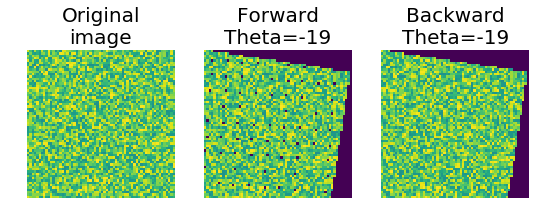

In [8]:
theta = -19
image=image
for_rot_image = forward_rotate_image(image=image, theta=theta)
bak_rot_image = backward_rotate_image(image=image, theta=theta)

list_image = [image, for_rot_image, bak_rot_image]
list_title = ["Original\nimage", "Forward\nTheta={}".format(theta), "Backward\nTheta={}".format(theta)]
show_image_horizontally(list_image=list_image, list_title=list_title)

#### Run multi rotation
Do not be a hero, use small Thetas and steps! :)

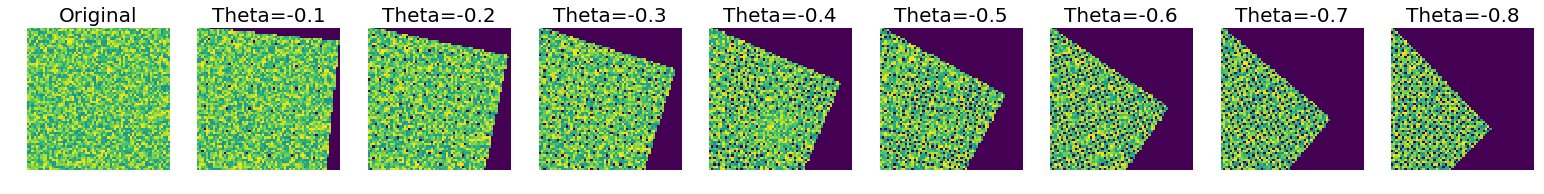

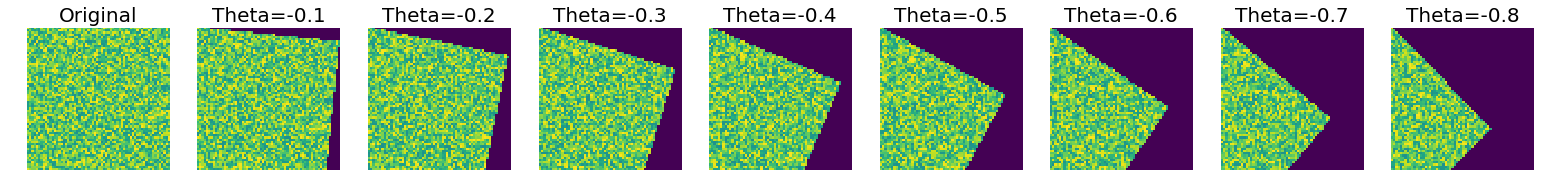

In [9]:
step = -0.1
list_theta = np.arange(start=-0.1, stop=-2, step=step)

multi_rotate_image(image=image, list_theta=list_theta, rotation_function=forward_rotate_image)
multi_rotate_image(image=image, list_theta=list_theta, rotation_function=backward_rotate_image)

## Example 2: Rotating image of Mona

In [10]:
image_path_mona = "data/mona.png"
image_mona = imread(image_path_mona, flatten=True)

#### Rotate Mona using forward mapping and backward mapping

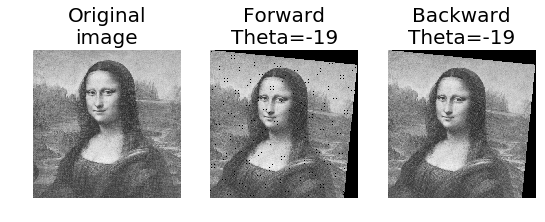

In [11]:
theta_mona = -0.1
for_rot_image_mona = forward_rotate_image(image=image_mona, theta=theta_mona)
bak_rot_image_mona = backward_rotate_image(image=image_mona, theta=theta_mona)

list_image_mona = [image_mona, for_rot_image_mona, bak_rot_image_mona]
list_title_mona = ["Original\nimage", "Forward\nTheta={}".format(theta), "Backward\nTheta={}".format(theta)]
show_image_horizontally(list_image=list_image_mona, list_title=list_title_mona, cmap="gray")

#### Run multi rotation on Mona
Still no time to be a hero, use small Thetas and steps! :)

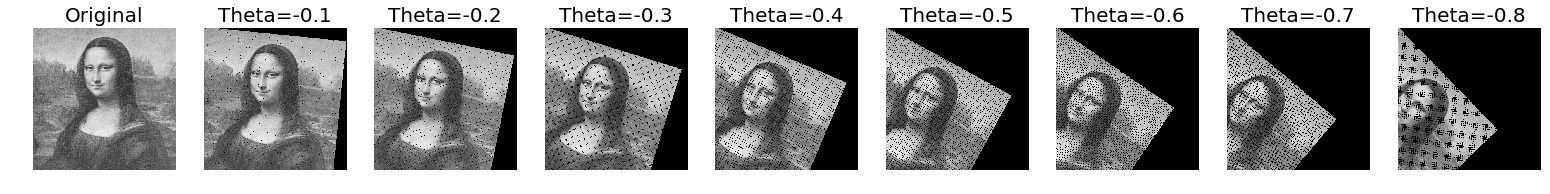

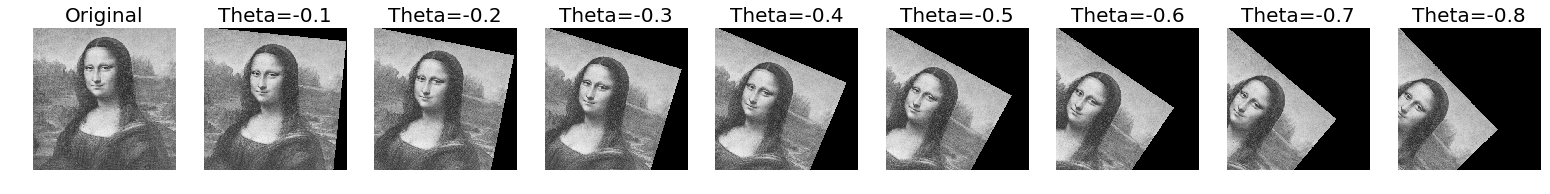

In [12]:
step = -0.1
list_theta_mona = np.arange(start=-0.1, stop=-2, step=step)

multi_rotate_image(image=image_mona, list_theta=list_theta_mona, rotation_function=forward_rotate_image, cmap="gray")
multi_rotate_image(image=image_mona, list_theta=list_theta_mona, rotation_function=backward_rotate_image, cmap="gray")

---

---

# Image Translation

### Formula for translation

x'=x+$\Delta$x <br>
y'=y+$\Delta$y <br>

Translation function moves the pixels of an image for $\Delta$x in rows (horizontal) and for $\Delta$y in columns (vertical)

#### Translate image

In [13]:
def translate_image(image, delta_x, delta_y):
    x_len = image.shape[0]
    y_len = image.shape[1]
    # create cartesian product of number of rows and number of columns
    matrix_loc = np.array([index for index, x in np.ndenumerate(image)]) 

    trans_image = np.zeros(image.shape) # initialize translate image matrix

    for m in matrix_loc: # loop through every coordinate
        m_x = m[0]
        m_y = m[1]
        x_ = m_x + delta_x
        y_ = m_y + delta_y
        if (0 <= x_ < x_len) and (0 <= y_ < y_len): # if the x' and y' are within the original image size
            trans_image[x_][y_] = image[m_x][m_y]
    return trans_image

## Example 1: Translating randomly generated image

#### Generate random image

In [14]:
# np.random.seed(1)
size = 64
t_image = np.random.randint(vmin, vmax, size=(size, size))

#### Translate random image

In [15]:
delta_x = 7
delta_y = 3

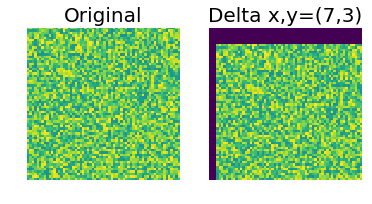

In [16]:
trans_image = translate_image(image=t_image, delta_x=delta_x, delta_y=delta_y)

list_image_trans = [t_image, trans_image]
list_title_trans = ["Original", "Delta x,y=({},{})".format(delta_x, delta_y)]
show_image_horizontally(list_image=list_image_trans, list_title=list_title_trans)

## Example 2: Translating image of Mona

In [17]:
image_path_mona = "data/mona.png"
image_mona = imread(image_path_mona, flatten=True)

In [18]:
delta_x = 200
delta_y = 100

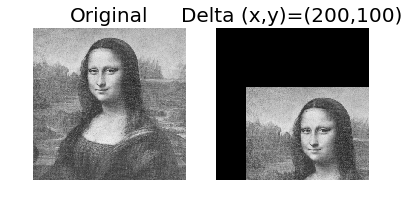

In [19]:
trans_image_mona = translate_image(image=image_mona, delta_x=delta_x, delta_y=delta_y)

list_image_trans_mona = [image_mona, trans_image_mona]
list_title_trans_mona = ["Original", "Delta (x,y)=({},{})".format(delta_x, delta_y)]
show_image_horizontally(list_image=list_image_trans_mona, list_title=list_title_trans_mona, cmap="gray")

---

---

# Concatenating rotation and translation

## Example 1: Transforming randomly generated image

#### Generate random image

In [20]:
# np.random.seed(1)
size = 64
t_image = np.random.randint(vmin, vmax, size=(size, size))

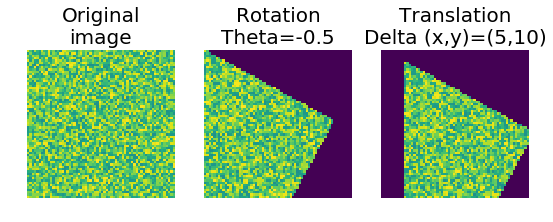

In [21]:
theta = -0.5
# rot_image = forward_rotate_image(image=image, theta=theta)
rot_image = backward_rotate_image(image=image, theta=theta)

delta_x = 5
delta_y = 10
trans_image = translate_image(image=rot_image, delta_x=delta_x, delta_y=delta_y)

list_image = [image, rot_image, trans_image]
list_title = ["Original\nimage", "Rotation\nTheta={}".format(theta), "Translation\nDelta (x,y)=({},{})".format(delta_x, delta_y)]
show_image_horizontally(list_image=list_image, list_title=list_title)

## Example 2: Transforming image of Mona

In [22]:
image_path_mona = "data/mona.png"
image_mona = imread(image_path_mona, flatten=True)

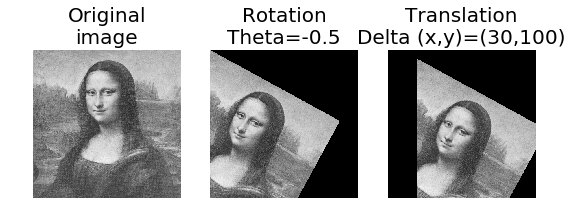

In [23]:
theta = -0.5
# rot_image_mona = forward_rotate_image(image=image_mona, theta=theta)
rot_image_mona = backward_rotate_image(image=image_mona, theta=theta)

delta_x = 30
delta_y = 100
trans_image_mona = translate_image(image=rot_image_mona, delta_x=delta_x, delta_y=delta_y)

list_image_mona = [image_mona, rot_image_mona, trans_image_mona]
list_title_mona = ["Original\nimage", "Rotation\nTheta={}".format(theta), "Translation\nDelta (x,y)=({},{})".format(delta_x, delta_y)]
show_image_horizontally(list_image=list_image_mona, list_title=list_title_mona, cmap="gray")